<a href="https://colab.research.google.com/github/celiaferreira/Covid19_RX/blob/master/4_2_DataGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 4.2. Data Augmentation
De modo a aumentar os dados COVID, ainda pouco disponíveis, procedeu-se à geração de novos dados. Esta ação ajudará no controlo do **overfitting** e na previsão do modelo.

Por cada imagem COVID-19 (label=0) no conjunto de treino, a suguinte função **gerará 3 imagens adicionais**, recorrendo a ligeiras translaões e rotações da imagem inicial. Para o problema em análise, as restantes transformações (enviezamento, zoom, simetria) não foram consideradas adequadas.

In [ ]:
!mkdir /content/Augmentation

In [ ]:
rain_datagen = ImageDataGenerator(
      rotation_range=25,#rotacao:0;180
      width_shift_range=0.1,#translaçao vertical
      height_shift_range=0.1,# translação horizontal
      shear_range=0,#enviezamento: quadrado->losango
      zoom_range=0,#zoom
      horizontal_flip=False,#simetria
      fill_mode='nearest')
k=0
#max_len=len(y_all)-1

for j in range(1,len(y_train),1):
    if y_train[j]==0: #covid19
        k=k+1
        img = X_train[j]
        # Convert it to a Numpy array
        x = image.img_to_array(img)

        # Reshape it to (1, shape)
        x = x.reshape((1,) + x.shape)

        # The .flow() command below generates batches of randomly transformed images.
        # It will loop indefinitely, so we need to `break` the loop at some point!
        i = 0
        plt.rcParams['figure.figsize'] = (10.0, 10.0)
        plt.subplots_adjust(wspace=0.5, hspace=0.2)
        for batch in train_datagen.flow(x, batch_size=1):
            imgplot = plt.imshow(image.array_to_img(batch[0]),cmap='gray', vmin=0, vmax=255)
            i += 1
            #triplicar imagens
            if i % 4 == 0:
                break
            plt.axis('off')
            #plt.savefig("test.jpg", bbox_inches='tight')

            plt.savefig('Augmentation/augmented_'+str(j)+str(i)+".jpg")
        #plt.show() 
print(k)

De seguida, as imagens geradas são novamente guardadas em arrays:

In [ ]:
def get_data_augmented(folderName):
    X = []
    y = []
    label=0
    for image_filename in tqdm(os.listdir(folderName)):
        img_file = cv2.imread(folderName + '/' + image_filename)
        if img_file is not None:
            img_file = skimage.transform.resize(img_file, (200, 200, 3),mode='constant',anti_aliasing=True)
            img_file = rgb2gray(img_file)
            img_arr = np.asarray(img_file)
            X.append(img_arr)
            y.append(label)
                    
    X = np.asarray(X)
    y = np.asarray(y)  
    return X,y

Por fim são anexadas às imagens de treino originais:

In [ ]:
Augmented_Data='Augmentation'
#LOAD_FROM_IMAGES = True
LOAD_FROM_IMAGES = False
if LOAD_FROM_IMAGES:
    #converter imagens em arrays
    BD_X, BD_Y = get_data_augmented(Augmented_Data)
    #anexar aos dadps anteriores
    X_all_aug=np.append(X_train,BD_X)
    y_all_aug=np.append(y_train,BD_Y)
    #gravar os arrays em ficheiros binários numpy (.npy)   
    np.save('x_Arg_2.npy', X_train_aug)
    np.save('y_Arg_2.npy',y_train_aug)    
else:
    #fazer o load dos arrays guardados
    X_train_aug = np.load('x_Arg_2.npy')
    y_train_aug = np.load('y_Arg_2.npy') 

* Reshape das imagens: 200x200, gray-scale:

In [ ]:
X_train_aug = X_train_aug.reshape(len(y_train_aug),200,200,1)

In [ ]:
print('X_train:',X_train_aug.shape)
print('X_test:',X_test.shape)
print('X_val:',X_val.shape)

X_train: (5134, 200, 200, 1)
X_test: (2006, 200, 200, 1)
X_val: (1404, 200, 200, 1)


O plot evidencia um conjunto de dados mais balanceado.

#covid: 2669
#viral: 2082
#bacteria: 974
#normal: 2819


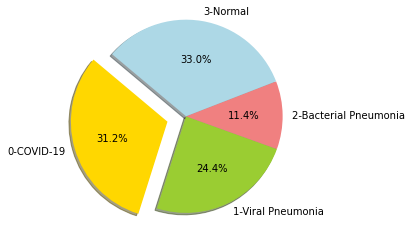

In [ ]:
labels = '0-COVID-19', '1-Viral Pneumonia', '2-Bacterial Pneumonia', '3-Normal'
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightblue']
explode = (0.2, 0, 0, 0)  # explode 1st slice
sizes = count_labels(y_all)
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()